In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gpd
#set matplotlib default fontsizes etc
mpl.rcParams['axes.titlesize'] = 'xx-small'
mpl.rcParams['axes.labelsize'] = 3
mpl.rcParams['legend.fontsize'] = 3 
mpl.rcParams['ytick.labelsize'] = 3 
mpl.rcParams['ytick.major.size'] = 1 

In [2]:
main_path = "data directory"


#Data comes from: https://geoportal.statistics.gov.uk/datasets/ons::nuts-level-1-january-2018-full-clipped-boundaries-in-the-united-kingdom-1/explore?location=53.019563%2C-2.015708%2C6.72
#set up the file path and read the shapefile data
fp = main_path + "UK_Regions.shp"
map_df = gpd.read_file(fp)

#read the csv data containing prices and loans
df = pd.read_csv(main_path + 'UK_Regions.csv')

In [3]:
#create id column to join shapefile to csv data and merge the 2
map_df["id"] = map_df.index + 1
main_df = pd.merge(map_df, df, left_on='id', right_on = 'OBJECTID')

In [4]:
#Select columns to create custom legends
price_data = main_df[['NUTS118NM','Average house price']]
loans_data = main_df[['NUTS118NM','Loans £m']]

#sort prices and loans from highest to lowest for the legend
price_data = price_data.sort_values('Average house price')
loans_data = loans_data.sort_values('Loans £m')

#convert the above to lists to feed into malplotlib
prices_by_region = price_data['NUTS118NM'].to_list()
loans_by_region = loans_data['NUTS118NM'].to_list()

In [5]:
#create colourmaps for legends to match map colours. For each colourmap, we make 12 labels, 1 for each region in the shp file.
cmap1 = plt.cm.Blues
custom_lines_ax1 = [Line2D([0], [0], color=cmap1(0.), lw=4),
                Line2D([0], [0], color=cmap1(0.083), lw=4),
                Line2D([0], [0], color=cmap1(0.17), lw=4),
                Line2D([0], [0], color=cmap1(0.25), lw=4),
                Line2D([0], [0], color=cmap1(0.33), lw=4),
                Line2D([0], [0], color=cmap1(0.42), lw=4),
                Line2D([0], [0], color=cmap1(0.5), lw=4),
                Line2D([0], [0], color=cmap1(0.58), lw=4),
                Line2D([0], [0], color=cmap1(0.66), lw=4),
                Line2D([0], [0], color=cmap1(0.75), lw=4),
                Line2D([0], [0], color=cmap1(0.83), lw=4),
                Line2D([0], [0], color=cmap1(1.), lw=4)]

cmap2 = plt.cm.Greens
custom_lines_ax2 = [Line2D([0], [0], color=cmap2(0.), lw=4),
                Line2D([0], [0], color=cmap2(0.083), lw=4),
                Line2D([0], [0], color=cmap2(0.17), lw=4),
                Line2D([0], [0], color=cmap2(0.25), lw=4),
                Line2D([0], [0], color=cmap2(0.33), lw=4),
                Line2D([0], [0], color=cmap2(0.42), lw=4),
                Line2D([0], [0], color=cmap2(0.5), lw=4),
                Line2D([0], [0], color=cmap2(0.58), lw=4),
                Line2D([0], [0], color=cmap2(0.66), lw=4),
                Line2D([0], [0], color=cmap2(0.75), lw=4),
                Line2D([0], [0], color=cmap2(0.83), lw=4),
                Line2D([0], [0], color=cmap2(1.), lw=4)]

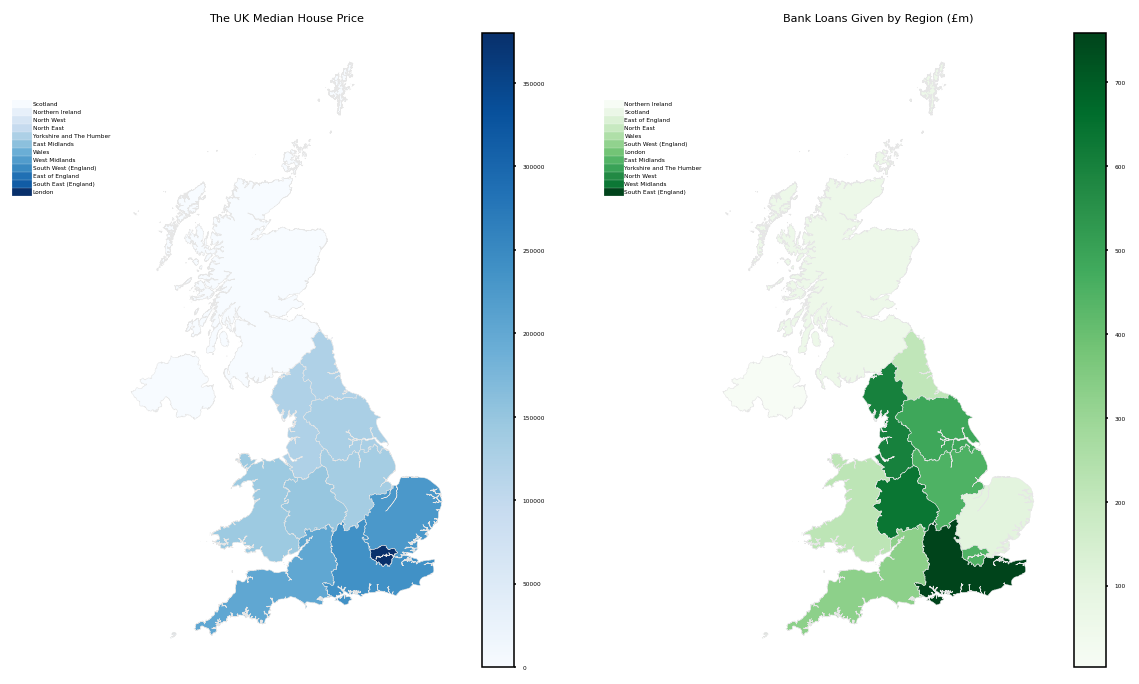

In [8]:
#Plot final charts
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(10,6), dpi=140)
main_df.plot(column='Average house price', cmap='Blues', linewidth=0.25, ax=ax1, edgecolor='0.9', legend=True)
main_df.plot(column='Loans £m', cmap='Greens', linewidth=0.25, ax=ax2, edgecolor='0.9', legend=True)
ax1.title.set_text('The UK Median House Price')
ax2.title.set_text('Bank Loans Given by Region (£m)')
ax1.axis('off')
ax2.axis('off')
ax1.legend(custom_lines_ax1, prices_by_region, loc='best', bbox_to_anchor=(0, 0.9), frameon=False)
ax2.legend(custom_lines_ax2, loans_by_region, loc='best', bbox_to_anchor=(0, 0.9), frameon=False)